<a href="https://colab.research.google.com/github/LNOI/mlop_ids_dacn/blob/main/DeepLearning_NN_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  seaborn
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install wget
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import wget
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=d38ece038b0cd14930cb8760ab0e4947e2e355c5f7fa04967d0dee6313fbcef2
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [6]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(len(columns))


42


In [7]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [8]:
# path = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
# wget.download(path)
df = pd.read_csv('kddcup.data_10_percent.gz',names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
df.shape

(494021, 43)

In [9]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [ ]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [ ]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'flag', 'protocol_type']

In [ ]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

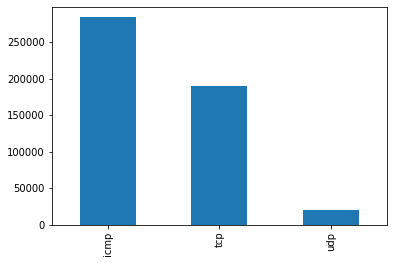

In [ ]:
bar_graph('protocol_type')

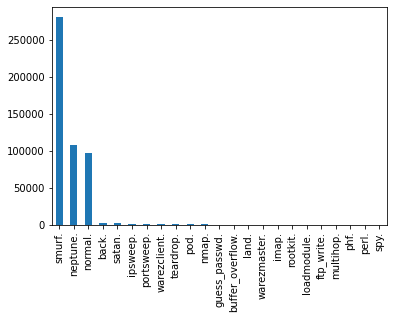

In [ ]:
bar_graph('target')

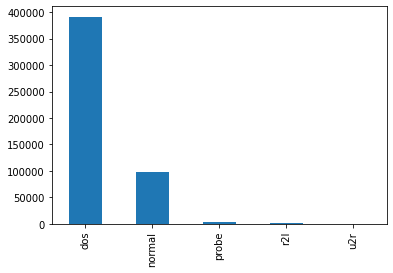

In [ ]:
bar_graph('Attack Type')

<ipython-input-11-31c74935275d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')# drop columns with NaN


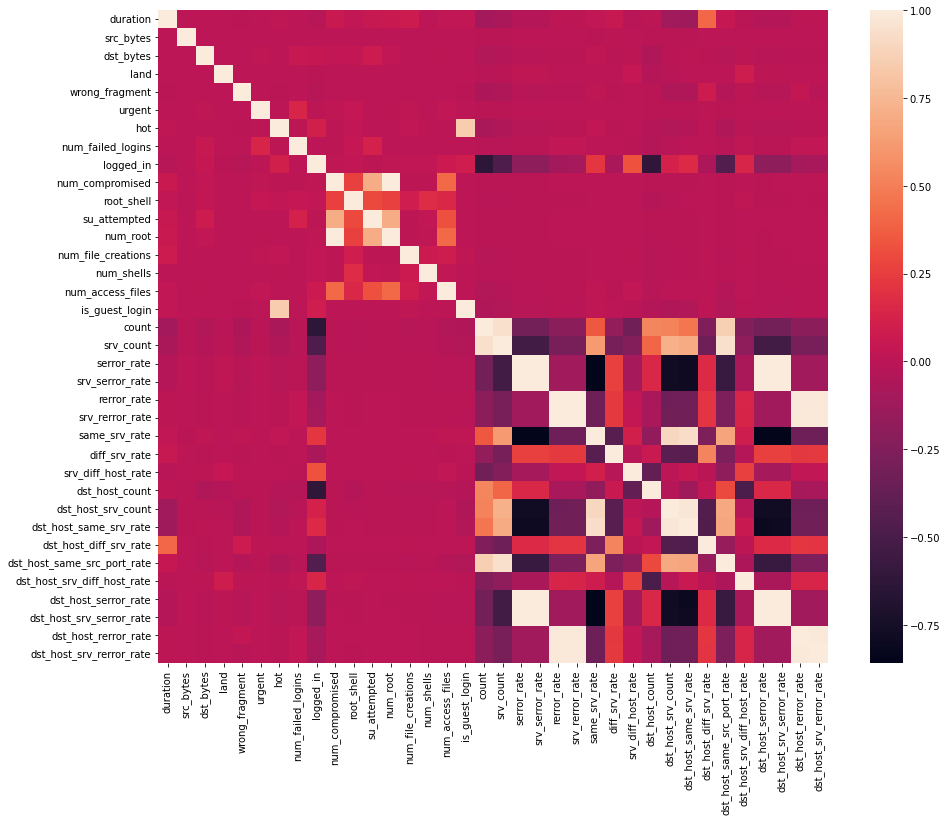

In [11]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [12]:

df.drop('num_root',axis = 1,inplace = True)
df.drop('srv_serror_rate',axis = 1,inplace = True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [13]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

<ipython-input-13-2938f6df5f03>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_std = df.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

In [ ]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [14]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [ ]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [15]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [16]:
df.drop('service',axis = 1,inplace= True)

In [17]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
Y_train = lb.fit_transform(Y_train)
Y_test = lb.fit_transform(Y_test)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994,) (163027,)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
def f1_score(y_true, y_pred):
    """
    Computes the F1 score given the true and predicted labels
    """
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(y_pred, 1)), tf.float32))
    fp = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 0), tf.equal(y_pred, 1)), tf.float32))
    fn = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(y_pred, 0)), tf.float32))
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    f1_score = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    return f1_score


def recall(y_true, y_pred):
    """
    Computes the Recall given the true and predicted labels
    """
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(y_pred, 1)), tf.float32))
    fn = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(y_pred, 0)), tf.float32))
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    return recall

def precision(y_true, y_pred):
    """
    Computes the Precision given the true and predicted labels
    """
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(y_pred, 1)), tf.float32))
    fp = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 0), tf.equal(y_pred, 1)), tf.float32))
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    return precision

def create_model():
    model = tf.keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_dim=30, kernel_initializer='random_uniform'),
        keras.layers.Dense(1, activation='sigmoid', kernel_initializer='random_uniform'),
        keras.layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=[tf.metrics.SparseCategoricalAccuracy(),precision, f1_score, recall])
    return model


model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
 dense_5 (Dense)             (None, 5)                 10        
                                                                 
Total params: 971
Trainable params: 971
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
# start_time = time.time()
# model.fit(X_train,Y_train.values.ravel())
# end_time = time.time()
model.fit(X_train, 
          Y_train,  
          epochs=100,
          batch_size=64,
          validation_data=(X_test, Y_test),)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5172/5172 [==============================] - 16s 3ms/step - loss: 0.2974 - sparse_categorical_accuracy: 0.9448 - precision: 0.1308 - f1_score: 0.1290 - recall: 0.1315 - val_loss: 0.1003 - val_sparse_categorical_accuracy: 0.9845 - val_precision: 0.1994 - val_f1_score: 0.1965 - val_recall: 0.2000
Epoch 2/100
5172/5172 [==============================] - 15s 3ms/step - loss: 0.0814 - sparse_categorical_accuracy: 0.9845 - precision: 0.1988 - f1_score: 0.1961 - recall: 0.2000 - val_loss: 0.0736 - val_sparse_categorical_accuracy: 0.9845 - val_precision: 0.1994 - val_f1_score: 0.1965 - val_recall: 0.2000
Epoch 3/100
5172/5172 [==============================] - 15s 3ms/step - loss: 0.0710 - sparse_categorical_accuracy: 0.9846 - precision: 0.1988 - f1_score: 0.1962 - recall: 0.2000 - val_loss: 0.0699 - val_sparse_categorical_accuracy: 0.9846 - val_precision: 0.1995 - val_f1_score: 0.1965 - val_recall: 0.2000
Epoch 4/100
5172/5172 [==============================] - 16s 3ms/step - loss: 0.0675 - s

In [ ]:
print("Testing time: ",end_time-start_time)

Testing time:  1126.238519668579


In [ ]:
start_time = time.time()
Y_train_pred = model.predict(X_train)
end_time = time.time()

10344/10344 [==============================] - 15s 1ms/step


array([[1.2111398e-12, 9.9820650e-01, 1.1026868e-05, 1.6984573e-03,
        8.3992818e-05],
       [9.9994761e-01, 8.1924625e-24, 5.2282769e-05, 1.1839557e-10,
        2.2821016e-12],
       [9.9994761e-01, 8.1924625e-24, 5.2282769e-05, 1.1839557e-10,
        2.2821016e-12],
       ...,
       [9.9994761e-01, 8.1924625e-24, 5.2282769e-05, 1.1839557e-10,
        2.2821016e-12],
       [9.1335468e-13, 9.9842286e-01, 9.1051152e-06, 1.4939404e-03,
        7.4123280e-05],
       [9.9994421e-01, 1.0043250e-23, 5.5816861e-05, 1.3229315e-10,
        2.5560626e-12]], dtype=float32)

In [ ]:
start_time = time.time()
Y_test_pred = model.predict(X_test)
end_time = time.time()

5095/5095 [==============================] - 7s 1ms/step


In [ ]:
# accuracy_score(Y_test,Y_test_pred)
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

5095/5095 - 6s - loss: 0.0097 - sparse_categorical_accuracy: 0.9986 - 6s/epoch - 1ms/step


In [ ]:
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

Restored model, accuracy: 99.86%


In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 30)                930       
                                                                 
 dense_53 (Dense)            (None, 1)                 31        
                                                                 
 dense_54 (Dense)            (None, 5)                 10        
                                                                 
Total params: 971
Trainable params: 971
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss, acc = new_model.evaluate(X_test, Y_test, verbose=2)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5095/5095 - 6s - loss: 0.0097 - sparse_categorical_accuracy: 0.9986 - 6s/epoch - 1ms/step


<BarContainer object of 1 artists>

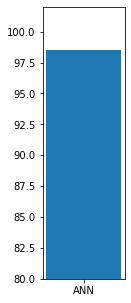

In [ ]:
names = ['ANN']
values = [98.485]
f = plt.figure(figsize=(5,5),num=1)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)